In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from maze_ga import MazeGa
from display import show_solution
import seaborn as sns

In [2]:
runs = pd.read_csv('./seminar_1/results/runs.csv', index_col=0)
runs.head()

,maze_file,generations,valid_only,population_size,parents,mutation_probability,elitism,use_custom_functions,run_id
0,maze_1.txt,150,True,25,0.07,0.01,0.01,True,21
1,maze_1.txt,150,True,25,0.01,0.01,0.01,True,1
2,maze_1.txt,150,True,25,0.01,0.01,0.10,True,2
3,maze_1.txt,150,True,25,0.07,0.01,0.10,True,22
4,maze_1.txt,150,True,25,0.25,0.01,0.01,True,81


In [3]:
gen_scores = pd.read_csv('./seminar_1/results/generations_scores.csv', index_col=0)
gen_scores.head()

,run_id,generation,fitness,path
0,21,0,79.6,1021120012303113001122023
1,21,1,83.8,1021120231010013301213232
2,21,2,83.8,1021120230332212323100310
3,21,3,79.6,1021120012303112001031223
4,21,4,87.8,1021223133230021130120201


In [4]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38005 entries, 0 to 38004
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   maze_file             38005 non-null  object 
 1   generations           38005 non-null  int64  
 2   valid_only            38005 non-null  bool   
 3   population_size       38005 non-null  int64  
 4   parents               38005 non-null  float64
 5   mutation_probability  38005 non-null  float64
 6   elitism               38005 non-null  float64
 7   use_custom_functions  38005 non-null  bool   
 8   run_id                38005 non-null  int64  
dtypes: bool(2), float64(3), int64(3), object(1)
memory usage: 2.4+ MB


In [5]:
gen_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2654126 entries, 0 to 2654125
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   run_id      int64  
 1   generation  int64  
 2   fitness     float64
 3   path        object 
dtypes: float64(1), int64(2), object(1)
memory usage: 101.2+ MB


In [6]:
def condition(maze_file, generations, valid_only, population_size, parents, mutation_probability, elitism, use_custom_functions):
    condition = (runs.maze_file == maze_file)
    if generations is not None:
        condition = condition & (runs.generations == generations)
    if valid_only is not None:
        condition = condition & (runs.valid_only == valid_only)
    if population_size is not None:
        condition = condition & (runs.population_size == population_size)
    if parents is not None:
        condition = condition & (runs.parents == parents)
    if mutation_probability is not None:
        condition = condition & (runs.mutation_probability == mutation_probability)
    if elitism is not None:
        condition = condition & (runs.elitism == elitism)
    if use_custom_functions is not None:
        condition = condition & (runs.use_custom_functions == use_custom_functions)
    return condition


In [7]:
runs.loc[condition("maze_5.txt", 150, False, 250, 0.25, 0.01, 0.01, False)]

,maze_file,generations,valid_only,population_size,parents,mutation_probability,elitism,use_custom_functions,run_id
16978,maze_5.txt,150,False,250,0.25,0.01,0.01,False,14973


### Maze 5 Score by Generation (Basic Parameters)

In [18]:
run_id = int(runs.loc[condition("maze_5.txt", 150, False, 25, 0.25, 0.01, 0.1, False)]["run_id"])
run_scores = gen_scores.loc[gen_scores.run_id == run_id]

Text(0, 0.5, 'Fitness')

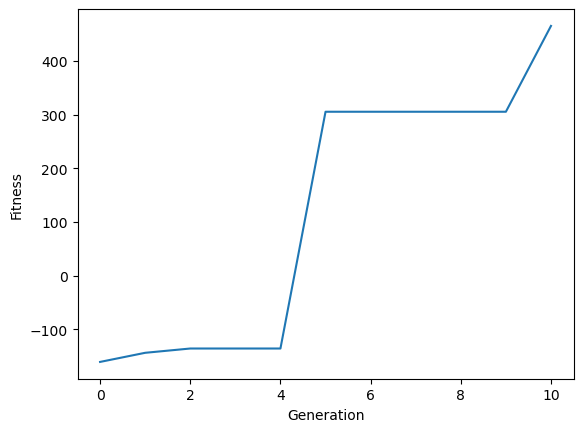

In [19]:
plt.plot(run_scores.generation[:11], run_scores.fitness[:11])
plt.xlabel("Generation")
plt.ylabel("Fitness")

In [26]:
last_solution = run_scores.loc[run_scores.generation == 150]

In [27]:
with open("./seminar_1/mazes/maze_5.txt", "r") as m:
    maze_string = m.read()
mga = MazeGa(maze_string)

In [15]:
solution_path = mga.path_str_to_list(last_solution.path.values[0])

In [25]:
show_solution(mga, solution_path, last_solution.fitness.values[0], sequential_display=False)

-----------------------------------
Current score 465.4
D D L L D D L U U D D D U U L U U R R U U L L R U R U L R U D R U U D R U U D L L U L D L R D D U L D D U U D D L L U D D R R U D U U L L R L D D D U R R R U R U R U R D R D R R L L U U R U L D D D D L L U D U R R R L U L D R D D U U L D U L L R U U U L R D U L L D D D L R U D U U L D L L D U 
###x###########
#..xxxxxx###..#
########x....##
#.....##x###.##
#.###...xx##..#
#.....###xxx###
####.####x#x###
##......#xxxxx#
#######.#x###.#
#.....xxxx#####
#.####xx#....##
##.xxx#x#######
#..##xxx......#
##...###.##.###
###############



### Maze 5 Score By Generation (Advanced Parameters)

In [20]:
run_id = int(runs.loc[condition("maze_5.txt", 150, True, 25, 0.25, 0.01, 0.1, True)]["run_id"])
run_scores = gen_scores.loc[gen_scores.run_id == run_id]

Text(0, 0.5, 'Fitness')

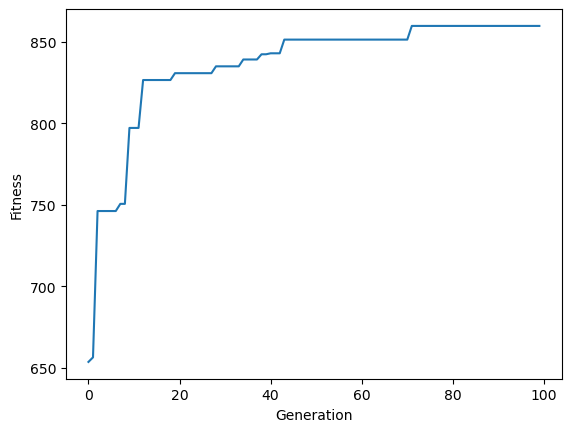

In [24]:
plot_n = 100
plt.plot(run_scores.generation[:plot_n], run_scores.fitness[:plot_n])
plt.xlabel("Generation")
plt.ylabel("Fitness")

In [28]:
solution_path = mga.path_str_to_list(last_solution.path.values[0])

In [29]:
show_solution(mga, solution_path, last_solution.fitness.values[0], sequential_display=False)

-----------------------------------
Current score 864.0
U R R U U U U U L U U U L L L L L U 
###x###########
#..xxxxxx###..#
########x....##
#.....##x###.##
#.###...xx##..#
#.....###x..###
####.####x#.###
##......#x....#
#######.#x###.#
#......xxx#####
#.####.S#....##
##....#.#######
#..##.........#
##...###.##.###
###############



### Parameter Dependance

In [46]:
best_scores = gen_scores.groupby("run_id").max()
best_scores

,generation,fitness,path
run_id,,,
0,150,92.0,2312223130123323201001101
1,150,92.0,2323122232323231332021323
2,150,92.0,2323221230310310231021123
3,150,92.0,2312312202313232023031233
4,150,92.0,2322123130123010301230112
...,...,...,...
15567,150,949.4,0111112111211311113300002003331111100220200200...
15568,150,1226.0,3323001331110133231133323310010000001333111112...
15569,150,983.0,0111112111211311113300002003331111100220200200...


In [48]:
gen_scores["run_id"].max()

15571

In [47]:
# run scores groupby run_id max fitness ordered
runs["best_score"] = best_scores["fitness"]

In [68]:
best_scores_maze5 = runs[(runs["best_score"].notna()) & (runs["maze_file"] == "maze_5.txt")][["valid_only", "population_size", "parents", "mutation_probability", "elitism", "use_custom_functions", "best_score"]]

<AxesSubplot:>

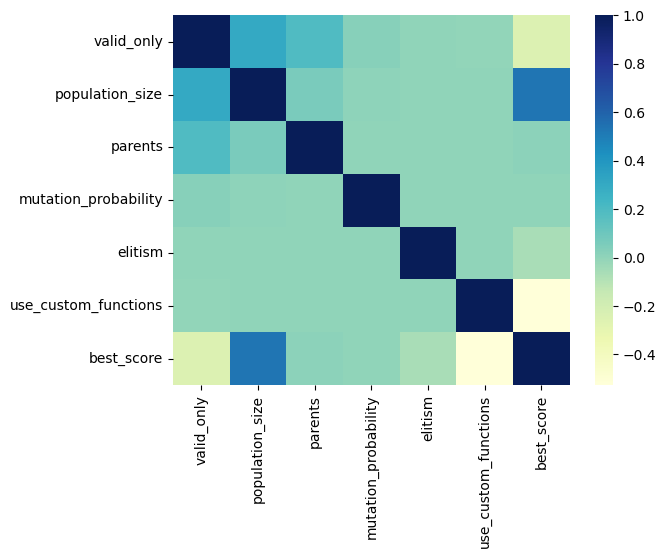

In [75]:
sns.heatmap(best_scores_maze5.corr(), annot=False, cmap="YlGnBu")